In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('../..')

from src.config import MAIN_TRAIN_PATH, TARGET_COLUMN

sns.set_style('whitegrid')

print(f"loading main training data from {MAIN_TRAIN_PATH} ...")
try:
    df_app = pd.read_csv(MAIN_TRAIN_PATH)
    print(f"data shape: {df_app.shape}")
except FileNotFoundError:
    print(f"no file {MAIN_TRAIN_PATH}")
    raise

loading main training data from /Users/ivan/ML/credit/data/raw/application_train.csv ...
data shape: (307511, 122)


In [2]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_app.info(verbose=False);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df_app.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
# анализ пропуска данных
missing = df_app.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / df_app.shape[0]) * 100
missing_info = pd.concat([missing, missing_percent], axis=1, keys=['missing', '%'])
missing_info = missing_info[missing_info['missing'] > 0]

print(missing_info.head(20))

                          missing          %
COMMONAREA_MEDI            214865  69.872297
COMMONAREA_AVG             214865  69.872297
COMMONAREA_MODE            214865  69.872297
NONLIVINGAPARTMENTS_MODE   213514  69.432963
NONLIVINGAPARTMENTS_AVG    213514  69.432963
NONLIVINGAPARTMENTS_MEDI   213514  69.432963
FONDKAPREMONT_MODE         210295  68.386172
LIVINGAPARTMENTS_MODE      210199  68.354953
LIVINGAPARTMENTS_AVG       210199  68.354953
LIVINGAPARTMENTS_MEDI      210199  68.354953
FLOORSMIN_AVG              208642  67.848630
FLOORSMIN_MODE             208642  67.848630
FLOORSMIN_MEDI             208642  67.848630
YEARS_BUILD_MEDI           204488  66.497784
YEARS_BUILD_MODE           204488  66.497784
YEARS_BUILD_AVG            204488  66.497784
OWN_CAR_AGE                202929  65.990810
LANDAREA_MEDI              182590  59.376738
LANDAREA_MODE              182590  59.376738
LANDAREA_AVG               182590  59.376738


0 (repaid): 282686 (91.93%)
1 (default): 24825 (8.07%)


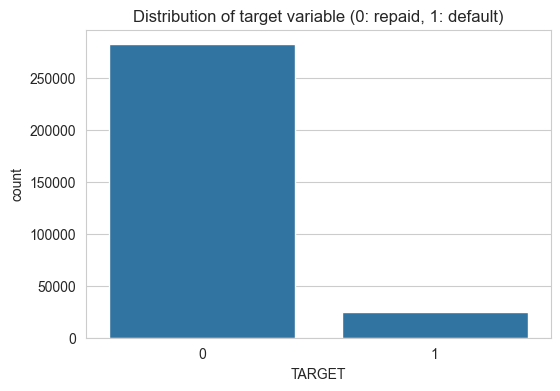

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df_app)
plt.title("Distribution of target variable (0: repaid, 1: default)")

target_counts = df_app[TARGET_COLUMN].value_counts()
print(f"0 (repaid): {target_counts[0]} ({target_counts[0]/len(df_app):.2%})")
print(f"1 (default): {target_counts[1]} ({target_counts[1]/len(df_app):.2%})")
plt.show();

# анализ числовых признаков

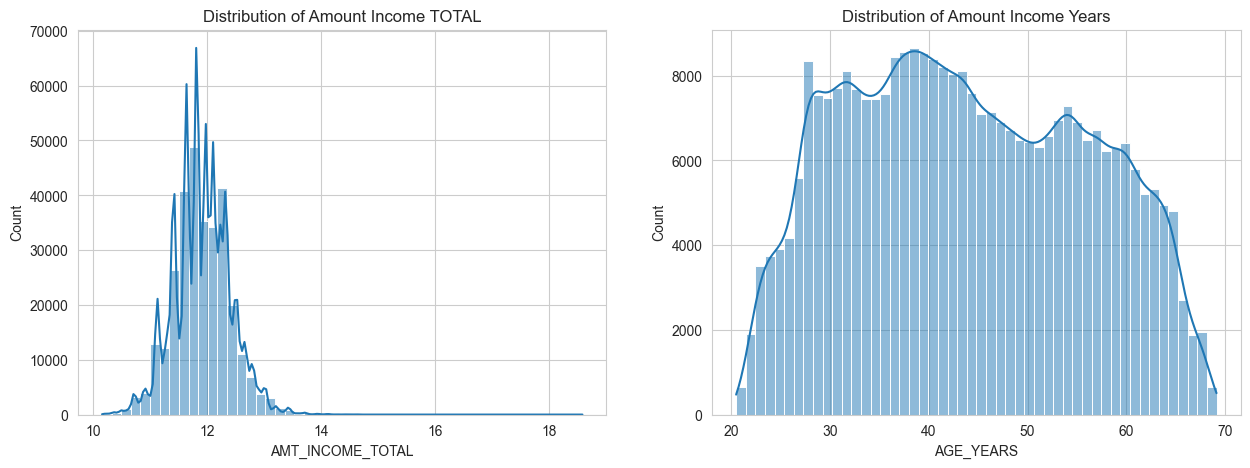

In [7]:
df_app['AGE_YEARS'] = df_app['DAYS_BIRTH'] / -365

plt.figure(figsize=(15, 5))

# 1 доход (сильный перекос необходим логарифм)
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_app['AMT_INCOME_TOTAL']), bins=50, kde=True)
plt.title('Distribution of Amount Income TOTAL')

# 2 возраст
plt.subplot(1, 2, 2)
sns.histplot(df_app['AGE_YEARS'], bins=50, kde=True)
plt.title('Distribution of Amount Income Years')

plt.show()

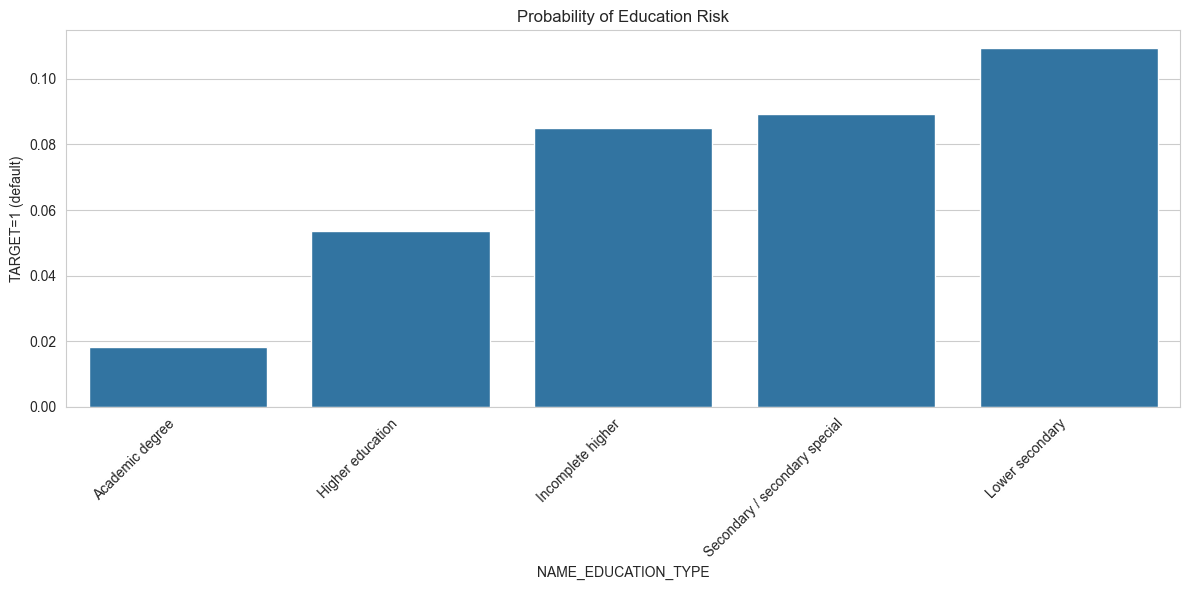

In [8]:
plt.figure(figsize=(12, 6))

education_risk = df_app.groupby('NAME_EDUCATION_TYPE')[TARGET_COLUMN].mean().sort_values()
sns.barplot(x=education_risk.index, y=education_risk.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('TARGET=1 (default)')
plt.title('Probability of Education Risk')
plt.tight_layout()
plt.show()